# Michelin Rated Restaurants in France - Visualisation

In [1]:
# Module import
import pandas as pd
import geopandas as gpd

In [2]:
# Function import
from Functions.functions_visualisation import (dataframe_info, filter_dataframe,
                                               top_restaurants, plot_choropleth, plot_area_info)

Importing the processed data

In [5]:
# All restaurants
all_france = pd.read_csv("../../data/France/all_restaurants(arrondissements).csv")

----
&nbsp;
### `dataframe_info` function

Provides concise information about a given dataframe

Arguments:

`data` (pandas.DataFrame or gpd.GeoDataFrame): 

the function prints out concise details about the dataframe.

In [6]:
dataframe_info(all_france)

Unique Regions: 13
Unique Departments: 93
Unique Arrondissements: 242
Unique Locations: 654

Shape: (1017, 15)


,name,address,location,arrondissement,department_num,department,capital,region,price,cuisine,url,award,stars,longitude,latitude
0,La Table du Castellet,"3001 route des Hauts-du-Camp, au Circuit Paul ...","Le Castellet, 83330",Toulon,83,Var,Toulon,Provence-Alpes-Côte d'Azur,€€€€,Creative,http://www.hotelducastellet.net/fr/restaurants...,3 Stars,3.0,5.783887,43.249929
1,Plénitude - Cheval Blanc Paris,8 quai du Louvre,"Paris, 75001",1st (Louvre),75,Paris,Paris,Île-de-France,€€€€,Creative,https://www.chevalblanc.com/fr/maison/paris/,3 Stars,3.0,2.342159,48.858815
2,Le Petit Nice,Anse de Maldormé,"Marseille, 13007",Marseille,13,Bouches-du-Rhône,Marseille,Provence-Alpes-Côte d'Azur,€€€€,Seafood,https://www.passedat.fr,3 Stars,3.0,5.352121,43.280086


---

### `filter_dataframe` function

Filters a dataframe based on specific regions, departments and arrondissements either for inclusion or exclusion.

**Arguments**:

- `data` (pandas.DataFrame): The primary dataframe to filter.
- `regions` (list[str]/str, optional): Targeted region(s) to include.
- `departments` (list[str]/str, optional): Targeted department(s) to include.
- `arrondissements` (list[str]/str, optional): Arrondissement(s) to include.
- `exclude_regions` (list[str]/str, optional): Region(s) to exclude.
- `exclude_departments` (list[str]/str, optional): Department(s) to exclude.
- `exclude_arrondissements` (list[str]/str, optional): Arrondissement(s) to exclude

**Returns**:

- pandas.DataFrame: The dataframe after applying filters.

##### Usage:

To include or exclude specific regions or departments, provide lists or single strings to the appropriate parameters. For example:

- For specific regions: `regions=['Region1', 'Region2']`
- To exclude departments: `exclude_departments='DepartmentX'`

The function ensures consistent filtering even with minor discrepancies in naming, thanks to the `_get_best_match` helper function.

---

In [7]:
# We define Paris, 75
paris = filter_dataframe(all_france, departments='Paris')
dataframe_info(paris)

Unique Regions: 1
Unique Departments: 1
Unique Arrondissements: 20
Unique Locations: 21

Shape: (153, 15)


,name,address,location,arrondissement,department_num,department,capital,region,price,cuisine,url,award,stars,longitude,latitude
1,Plénitude - Cheval Blanc Paris,8 quai du Louvre,"Paris, 75001",1st (Louvre),75,Paris,Paris,Île-de-France,€€€€,Creative,https://www.chevalblanc.com/fr/maison/paris/,3 Stars,3.0,2.342159,48.858815
6,Pierre Gagnaire,6 rue Balzac,"Paris, 75008",8th (Élysée),75,Paris,Paris,Île-de-France,€€€€,Creative,http://pierregagnaire-lerestaurant.com,3 Stars,3.0,2.300386,48.873251
8,Alléno Paris au Pavillon Ledoyen,8 avenue Dutuit,"Paris, 75008",8th (Élysée),75,Paris,Paris,Île-de-France,€€€€,Creative,https://www.yannick-alleno.com,3 Stars,3.0,2.316499,48.866093


We can be somewhat imprecise with spelling

In [8]:
# Exclude Île-de-France
rest_of_france = filter_dataframe(all_france, exclude_regions='ile de france')
dataframe_info(rest_of_france)

Unique Regions: 12
Unique Departments: 85
Unique Arrondissements: 208
Unique Locations: 613

Shape: (841, 15)


,name,address,location,arrondissement,department_num,department,capital,region,price,cuisine,url,award,stars,longitude,latitude
0,La Table du Castellet,"3001 route des Hauts-du-Camp, au Circuit Paul ...","Le Castellet, 83330",Toulon,83,Var,Toulon,Provence-Alpes-Côte d'Azur,€€€€,Creative,http://www.hotelducastellet.net/fr/restaurants...,3 Stars,3.0,5.783887,43.249929
2,Le Petit Nice,Anse de Maldormé,"Marseille, 13007",Marseille,13,Bouches-du-Rhône,Marseille,Provence-Alpes-Côte d'Azur,€€€€,Seafood,https://www.passedat.fr,3 Stars,3.0,5.352121,43.280086
3,Mirazur,30 avenue Aristide-Briand,"Menton, 06500",Nice,06,Alpes-Maritimes,Nice,Provence-Alpes-Côte d'Azur,€€€€,Creative,https://www.mirazur.fr/,3 Stars,3.0,7.528051,43.785930


In [9]:
# Define 'South of France'
# Capitalisation (or lack of) doesn't matter
south = filter_dataframe(all_france, regions=['Provence', 'aquitaine', 'occitanie', 'auvergne rhone alpes'])
dataframe_info(south)

Unique Regions: 4
Unique Departments: 41
Unique Arrondissements: 98
Unique Locations: 336

Shape: (490, 15)


,name,address,location,arrondissement,department_num,department,capital,region,price,cuisine,url,award,stars,longitude,latitude
0,La Table du Castellet,"3001 route des Hauts-du-Camp, au Circuit Paul ...","Le Castellet, 83330",Toulon,83,Var,Toulon,Provence-Alpes-Côte d'Azur,€€€€,Creative,http://www.hotelducastellet.net/fr/restaurants...,3 Stars,3.0,5.783887,43.249929
2,Le Petit Nice,Anse de Maldormé,"Marseille, 13007",Marseille,13,Bouches-du-Rhône,Marseille,Provence-Alpes-Côte d'Azur,€€€€,Seafood,https://www.passedat.fr,3 Stars,3.0,5.352121,43.280086
3,Mirazur,30 avenue Aristide-Briand,"Menton, 06500",Nice,06,Alpes-Maritimes,Nice,Provence-Alpes-Côte d'Azur,€€€€,Creative,https://www.mirazur.fr/,3 Stars,3.0,7.528051,43.785930


----
&nbsp;
## Michelin Stars by arrondissement, department and region

### `top_restaurants` function

Lists areas with the highest count of Michelin-starred restaurants based on a specified granularity.

**Arguments**:

- `data` (pandas.DataFrame): Contains restaurant details.
- `granularity` (str): Specifies granularity: 'region', 'department', or 'arrondissement'.
- `star_rating` (int): Michelin star rating (1, 2, or 3).
- `top_n` (int): Number of top areas to display.
- `display_restaurants` (bool, default=True): If True, shows names and locations of restaurants.
- `display_info` (bool, default=False): If True, provides additional details for each restaurant.

**Behavior**:

1. **Ranking**: Lists top areas based on count of Michelin-starred restaurants.
2. **Restaurant Details**: If `display_restaurants` is True, lists restaurants in each area. Additional details shown if `display_info` is True.

#### By Region

In [11]:
top_restaurants(rest_of_france, granularity='region', star_rating=3, top_n=3)

Top 3 regions with most ⭐⭐⭐ restaurants:


Region: Auvergne-Rhône-Alpes
7 ⭐⭐⭐ Restaurants




Region: Provence-Alpes-Côte d'Azur
7 ⭐⭐⭐ Restaurants




Region: Bourgogne-Franche-Comté
1 ⭐⭐⭐ Restaurant



### By Department

In [12]:
top_restaurants(south, granularity='department', star_rating=3, top_n=3, display_restaurants=False)

Top 3 departments with most ⭐⭐⭐ restaurants:


Department: Bouches-du-Rhône
4 ⭐⭐⭐ Restaurants


Department: Haute-Savoie
2 ⭐⭐⭐ Restaurants


Department: Var
2 ⭐⭐⭐ Restaurants



### By *Arrondissement*

In [13]:
# We choose an out of bounds 'top_n'
paca = filter_dataframe(all_france, regions='Provence')
top_restaurants(paca, granularity='arrondissement', star_rating=3, top_n=5, display_restaurants=False)

Top 5 arrondissements with most ⭐⭐⭐ restaurants:


Arrondissement: Marseille
3 ⭐⭐⭐ Restaurants


Arrondissement: Arles
1 ⭐⭐⭐ Restaurant


Arrondissement: Draguignan
1 ⭐⭐⭐ Restaurant


Arrondissement: Nice
1 ⭐⭐⭐ Restaurant


Arrondissement: Toulon
1 ⭐⭐⭐ Restaurant



----
&nbsp;
## Loading Geographical Data

The below GeoDataFrames contain Michelin restaurant counts, statistics and geographical data for each regional level

In [14]:
# Load GeoJSON arrondissement data
arrondissements = gpd.read_file("../../data/France/geodata/arrondissement_restaurants.geojson")
dataframe_info(arrondissements)

GeoDataFrame.
Unique Regions: 13
Unique Departments: 96
Unique Arrondissements: 320

Shape: (320, 18)


,code,arrondissement,department_num,department,capital,region,bib_gourmand,1_star,2_star,3_star,total_stars,starred_restaurants,municipal_population,population_density(inhabitants/sq_km),poverty_rate(%),average_net_hourly_wage(€),locations,geometry
0,01001,Belley,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes,0,1,0,0,1,1,123405,77.9,10.2,15.30,"{'1': [[46.0070045, 5.3605085]], '2': None, '3...","POLYGON ((5.12174 45.81118, 5.12665 45.81392, ..."
1,01002,Bourg-en-Bresse,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes,6,2,0,1,5,3,340382,118.4,8.8,15.65,"{'1': [[46.4340961, 4.9390332], [46.2987913, 4...","POLYGON ((4.98022 46.51520, 4.98355 46.51539, ..."
2,01003,Gex,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes,0,0,0,0,0,0,100314,247.8,12.4,15.32,"{'1': None, '2': None, '3': None}","POLYGON ((6.06401 46.41623, 6.06730 46.41494, ..."


In [15]:
# Load GeoJSON departmental data
departments = gpd.read_file("../../data/France/geodata/department_restaurants.geojson")
dataframe_info(departments)

GeoDataFrame.
Unique Regions: 13
Unique Departments: 96

Shape: (96, 20)


,code,department,capital,region,bib_gourmand,1_star,2_star,3_star,total_stars,starred_restaurants,GDP_millions(€),GDP_per_capita(€),poverty_rate(%),average_annual_unemployment_rate(%),average_net_hourly_wage(€),municipal_population,population_density(inhabitants/sq_km),area(sq_km),locations,geometry
0,01,Ain,Bourg-en-Bresse,Auvergne-Rhône-Alpes,7,4,0,1,7,5,16726.40,25425.63,10.5,5.5,15.34,657856.0,114.2,5760.56,"{'Bib': [[46.24887, 5.12659], [46.298183, 5.38...","POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,Laon,Hauts-de-France,0,1,0,0,1,1,12016.40,22699.26,18.0,10.5,13.92,529374.0,71.9,7362.64,"{'Bib': None, '1': [[49.5167484, 3.2253823]], ...","POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,Moulins,Auvergne-Rhône-Alpes,3,2,0,0,2,2,8278.98,24667.13,15.3,7.7,13.63,335628.0,45.7,7344.16,"{'Bib': [[46.3190731, 2.9562153], [46.5643976,...","POLYGON ((3.03207 46.79491, 3.03424 46.79080, ..."


In [16]:
# Load GeoJSON regional data
regions = gpd.read_file("../../data/France/geodata/region_restaurants.geojson")
dataframe_info(regions)

GeoDataFrame.
Unique Regions: 13

Shape: (13, 17)


,region,bib_gourmand,1_star,2_star,3_star,total_stars,starred_restaurants,GDP_millions(€),GDP_per_capita(€),poverty_rate(%),average_annual_unemployment_rate(%),average_net_hourly_wage(€),municipal_population,population_density(inhabitants/sq_km),area(sq_km),locations,geometry
0,Île-de-France,39,111,16,10,173,137,700754.40,57102.849021,15.544561,7.002391,20.681268,12271794.0,1021.62,12012.13,"{'Bib': [[48.8918373, 2.1947908], [48.8611264,...","POLYGON ((2.59052 49.07965, 2.63327 49.10838, ..."
1,Centre-Val de Loire,16,21,1,0,23,22,72707.28,28237.339229,12.898109,6.796385,14.801967,2574863.0,65.76,39153.00,"{'Bib': [[47.48631, 1.11419], [47.1208897, 1.5...","POLYGON ((2.87463 47.52042, 2.88845 47.50943, ..."
2,Bourgogne-Franche-Comté,21,27,4,1,38,32,76921.54,27455.358274,12.778156,6.318556,14.355314,2801695.0,58.65,47771.30,"{'Bib': [[47.0262483, 4.8352348], [47.8154316,...","POLYGON ((3.62942 46.74946, 3.57569 46.74952, ..."


---

### `plot_choropleth` function

Displays a choropleth map from a provided dataset.

**Arguments**:

- `df` (GeoDataFrame): The DataFrame with geospatial data.
- `column` (str): Column to visualize.
- `title` (str): Map title.
- `granularity` (str): Geographical scale - 'region', 'department', or 'arrondissement'. Default is 'department'.
- `restaurants` (bool): Overlay restaurant locations. Default is False.
- `show_legend` (bool): Display legend. Default is True.
- `cmap` (str): Choropleth colormap. Default is 'Blues'.
- `figsize` (tuple): Map size. Default is (10, 10).

The function checks for column existence and numerical type. It can label regions, departments, or arrondissements based on granularity.

---

##### We choose numerical column `population_density(inhabitants/sq_km)`

## All France

In [17]:
# We make a 'column' error. This returns a list of suitable columns

plot_choropleth(regions, column='population_density', title='Population Density (inhabitants/sq_km)', granularity='region', show_legend=False)

ValueError: The column 'population_density' does not exist in the DataFrame. Available numerical columns are:

['bib_gourmand', '1_star', '2_star', '3_star', 'total_stars', 'starred_restaurants', 'GDP_millions(€)', 'GDP_per_capita(€)', 'poverty_rate(%)', 'average_annual_unemployment_rate(%)', 'average_net_hourly_wage(€)', 'municipal_population', 'population_density(inhabitants/sq_km)', 'area(sq_km)']

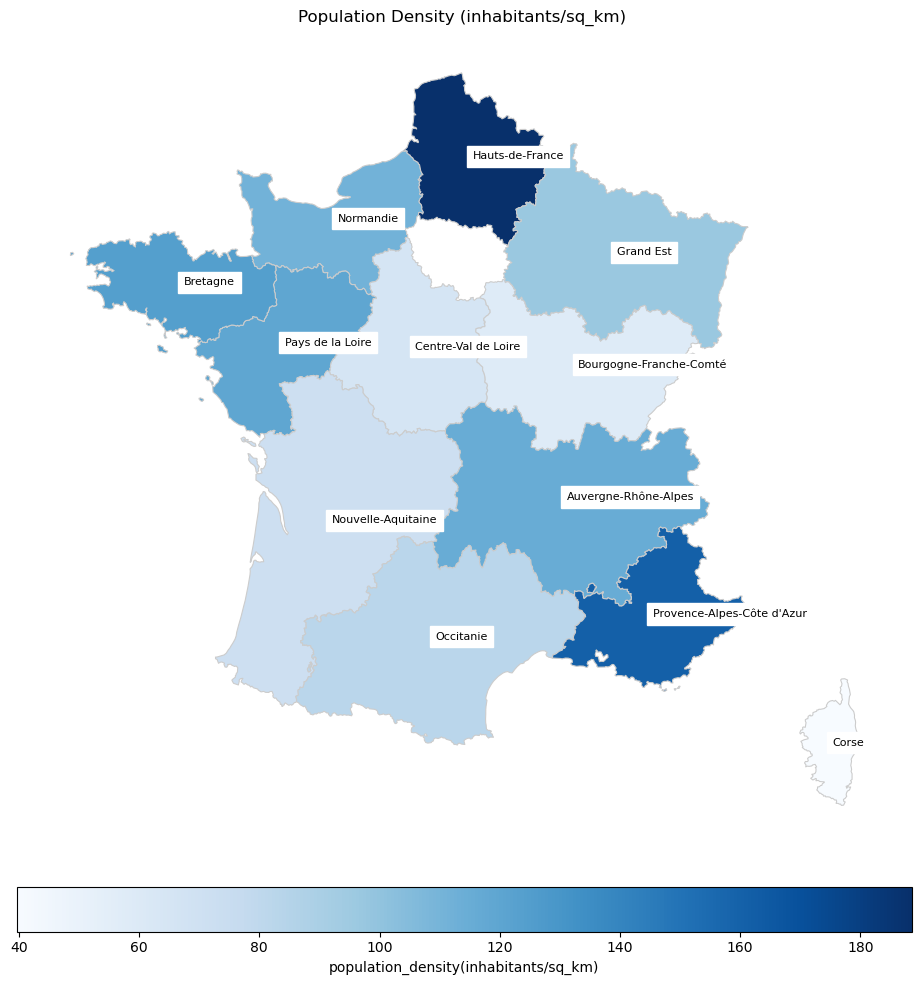

In [18]:
# We exclude Île-de-France
no_ile_de_france = filter_dataframe(regions, exclude_regions='ile de france')

plot_choropleth(no_ile_de_france, column='population_density(inhabitants/sq_km)', title='Population Density (inhabitants/sq_km)', granularity='region', show_legend=False)

----
&nbsp;
## Regions

### Auvergne-Rhône-Alpes

By Department

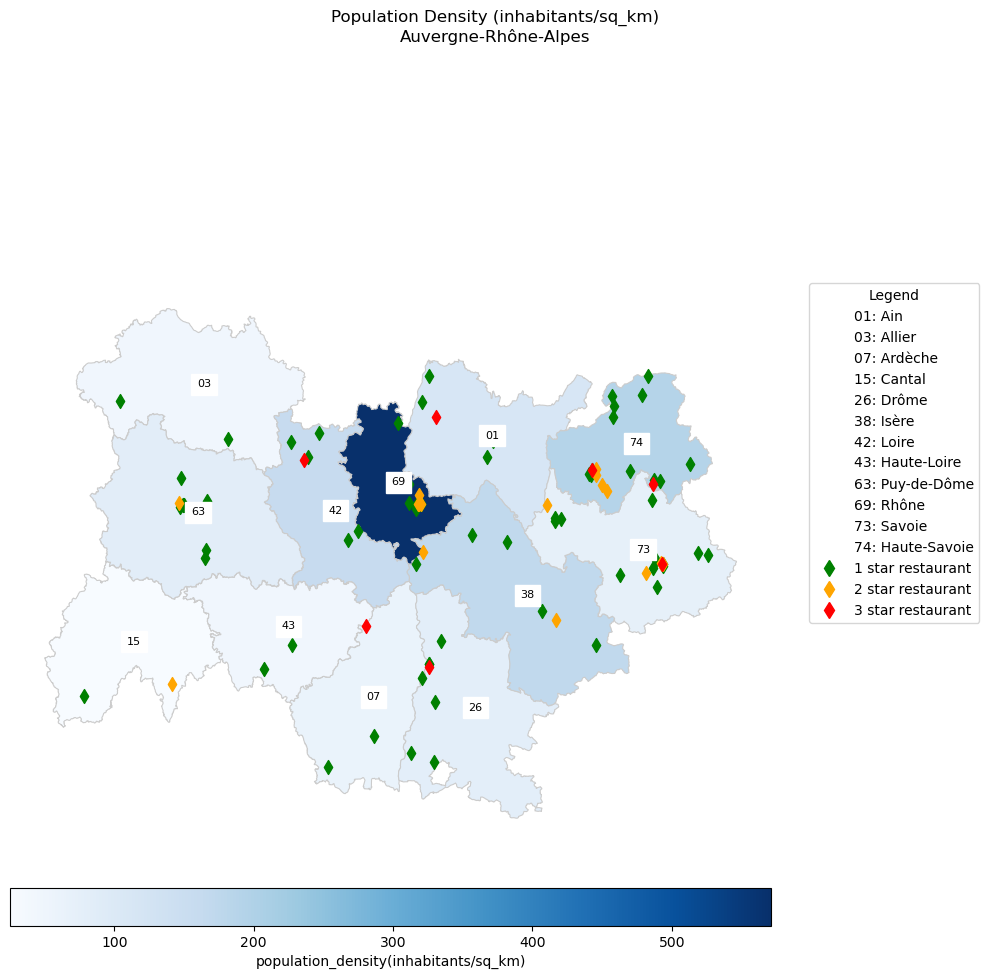

In [19]:
rhone_dept = filter_dataframe(departments, regions='auvergne rhone alpes')
plot_choropleth(rhone_dept, column='population_density(inhabitants/sq_km)', title='Population Density (inhabitants/sq_km)', granularity='department', restaurants=True, show_legend=True)

By *Arrondissement*

Removing Lyon Metropole

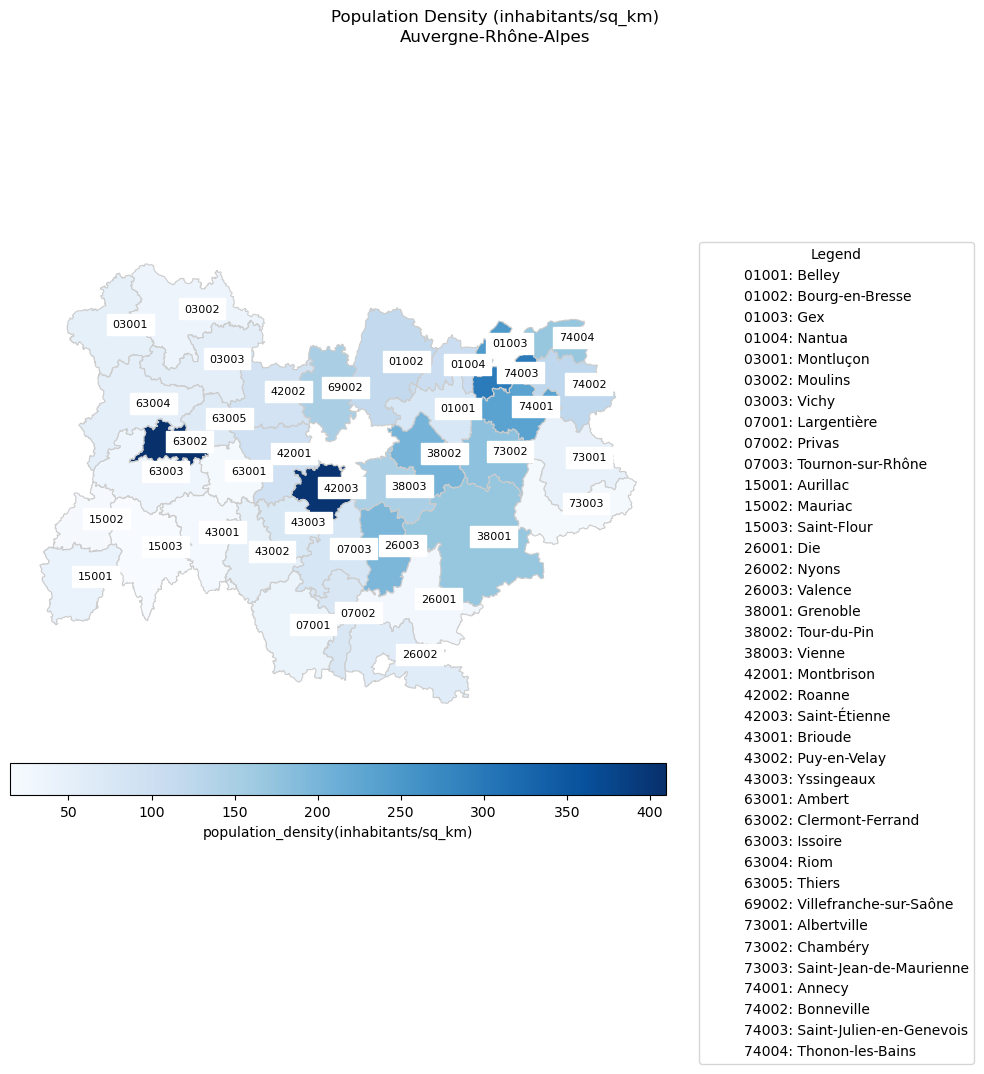

In [20]:
# Isolate Auvergne-Rhône-Alpes
rhone_arron = filter_dataframe(arrondissements, regions='auvergne rhone alpes')

# Remove Lyon
rhone_no_lyon = filter_dataframe(rhone_arron, exclude_arrondissements='lyon')

plot_choropleth(rhone_no_lyon, column='population_density(inhabitants/sq_km)', title='Population Density (inhabitants/sq_km)', granularity='arrondissement', restaurants=False, show_legend=True)

##### If the region is large (as above), creating smaller groups of departments will produce a less cluttered graph

#### Zoom in Savoie

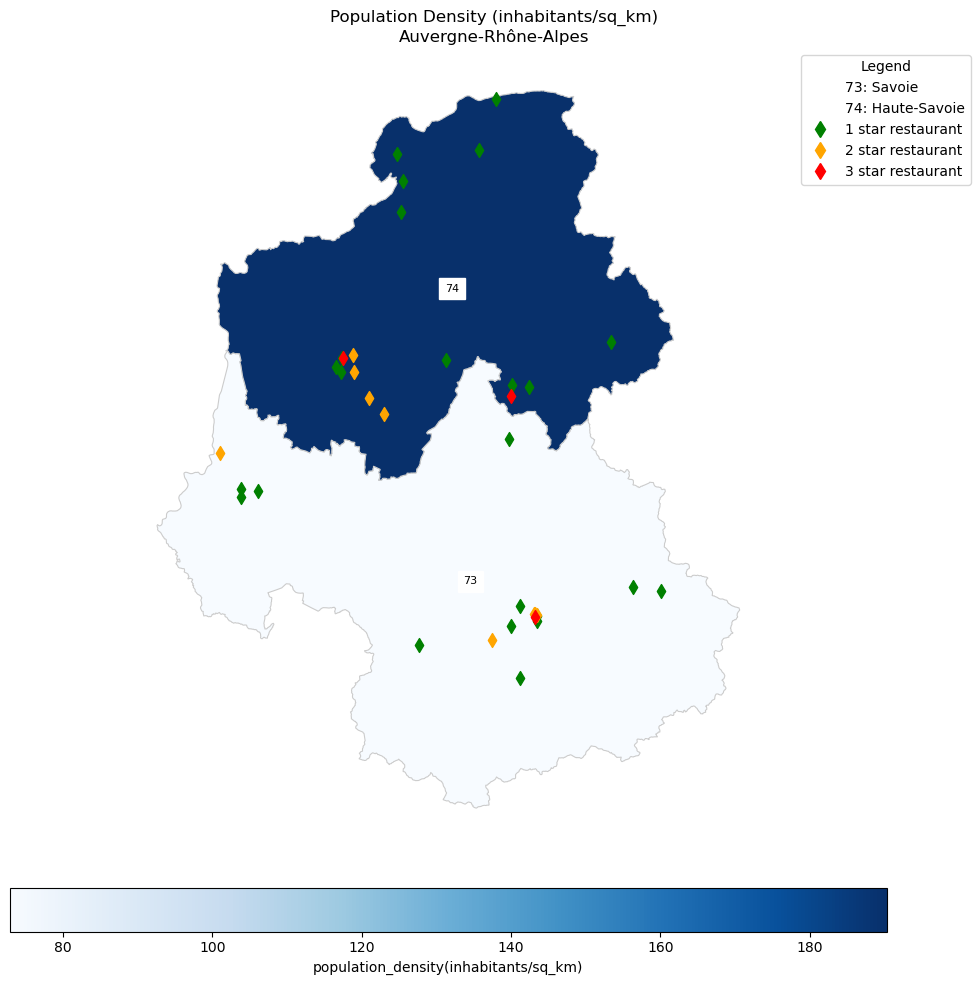

In [21]:
savoie = filter_dataframe(departments, departments=['savoie', 'haut savoie'])
plot_choropleth(savoie, column='population_density(inhabitants/sq_km)', title='Population Density (inhabitants/sq_km)', granularity='department', restaurants=True, show_legend=True)

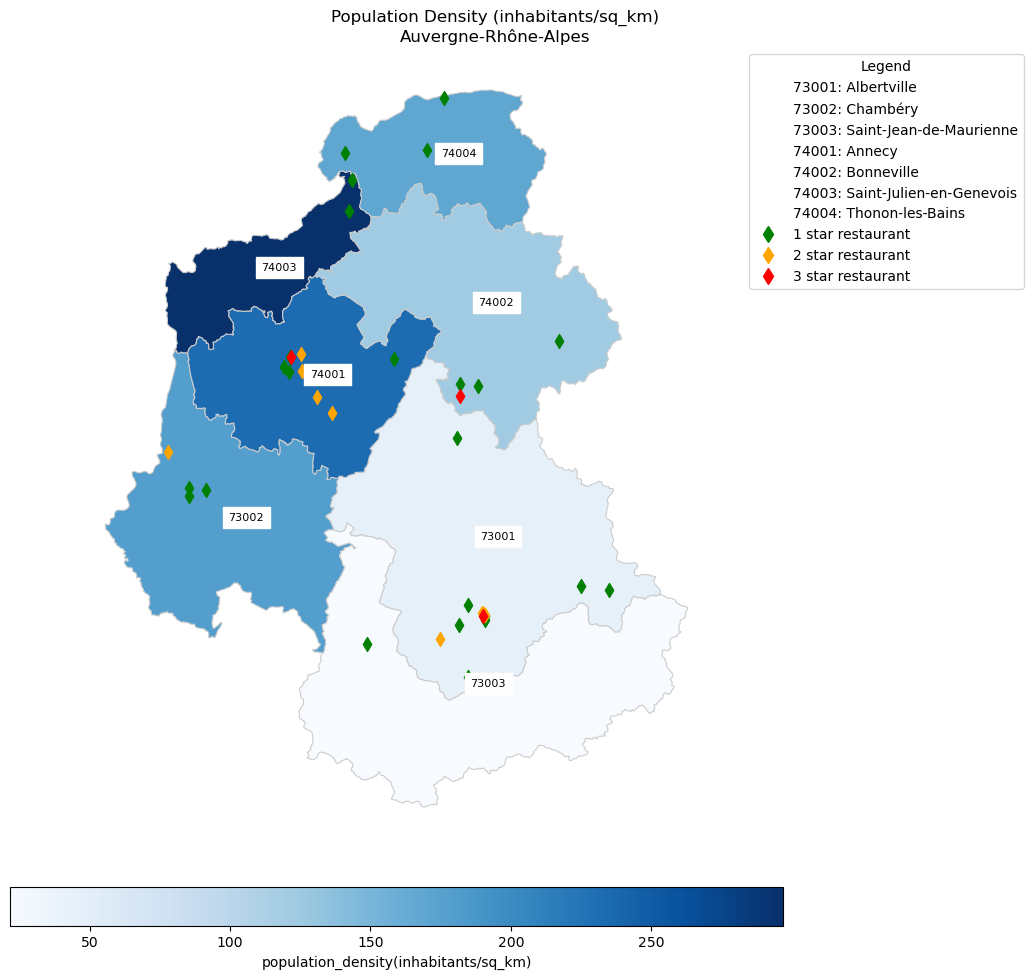

In [22]:
savoie = filter_dataframe(arrondissements, departments=['savoie', 'haut savoie'])
plot_choropleth(savoie, column='population_density(inhabitants/sq_km)', title='Population Density (inhabitants/sq_km)', granularity='arrondissement', restaurants=True, show_legend=True)

----
&nbsp;
## Nouvelle-Aquitaine

In [23]:
aquitaine = filter_dataframe(departments, regions='aquitaine')
dataframe_info(aquitaine)

GeoDataFrame.
Unique Regions: 1
Unique Departments: 12

Shape: (12, 20)


,code,department,capital,region,bib_gourmand,1_star,2_star,3_star,total_stars,starred_restaurants,GDP_millions(€),GDP_per_capita(€),poverty_rate(%),average_annual_unemployment_rate(%),average_net_hourly_wage(€),municipal_population,population_density(inhabitants/sq_km),area(sq_km),locations,geometry
17,16,Charente,Angoulême,Nouvelle-Aquitaine,1,5,0,0,5,5,10580.40,30082.05,14.6,6.9,14.19,351718.0,59.1,5951.24,"{'Bib': [[45.6735609, -0.2244992]], '1': [[45....","POLYGON ((-0.10294 45.96966, -0.09758 45.97113..."
18,17,Charente-Maritime,La Rochelle,Nouvelle-Aquitaine,5,2,1,0,4,3,16887.80,25755.02,12.4,6.9,14.21,655709.0,95.5,6866.06,"{'Bib': [[45.74673, -0.62401], [45.9445762, -1...","MULTIPOLYGON (((-1.11427 45.95173, -1.11630 45..."
20,19,Corrèze,Tulle,Nouvelle-Aquitaine,4,2,0,0,2,2,6115.33,25566.83,13.1,6.1,13.67,239190.0,40.8,5862.50,"{'Bib': [[45.2689144, 1.7696377], [45.2692196,...","POLYGON ((1.89873 45.69828, 1.89931 45.69828, ..."


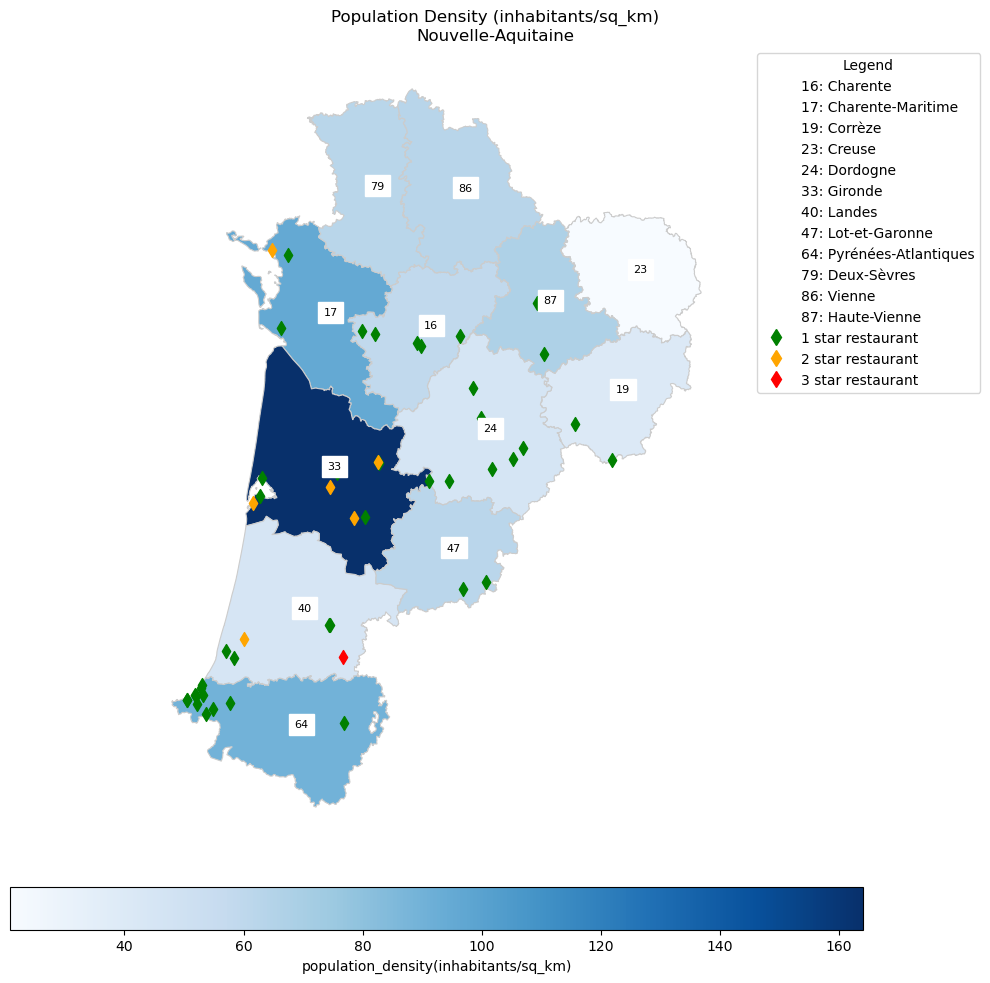

In [24]:
plot_choropleth(aquitaine, column='population_density(inhabitants/sq_km)', title='Population Density (inhabitants/sq_km)', granularity='department', restaurants=True, show_legend=True)

#### Zoom in Atlantic Coast

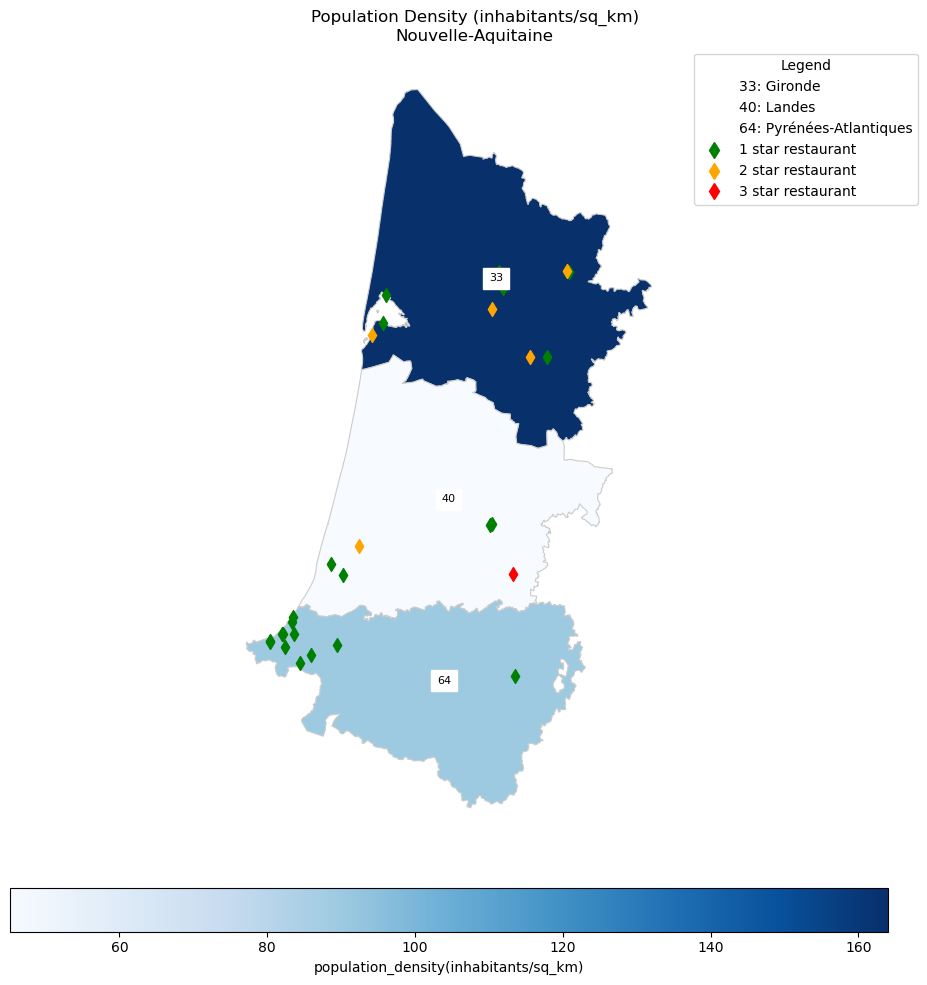

In [25]:
# Whole departments
atlantic = filter_dataframe(departments, departments=['gironde', 'landes', 'pyrennes atlantique'])
plot_choropleth(atlantic, column='population_density(inhabitants/sq_km)', title='Population Density (inhabitants/sq_km)', granularity='department', restaurants=True, show_legend=True)

#### Zoom in Gironde
(Arrondissement level)

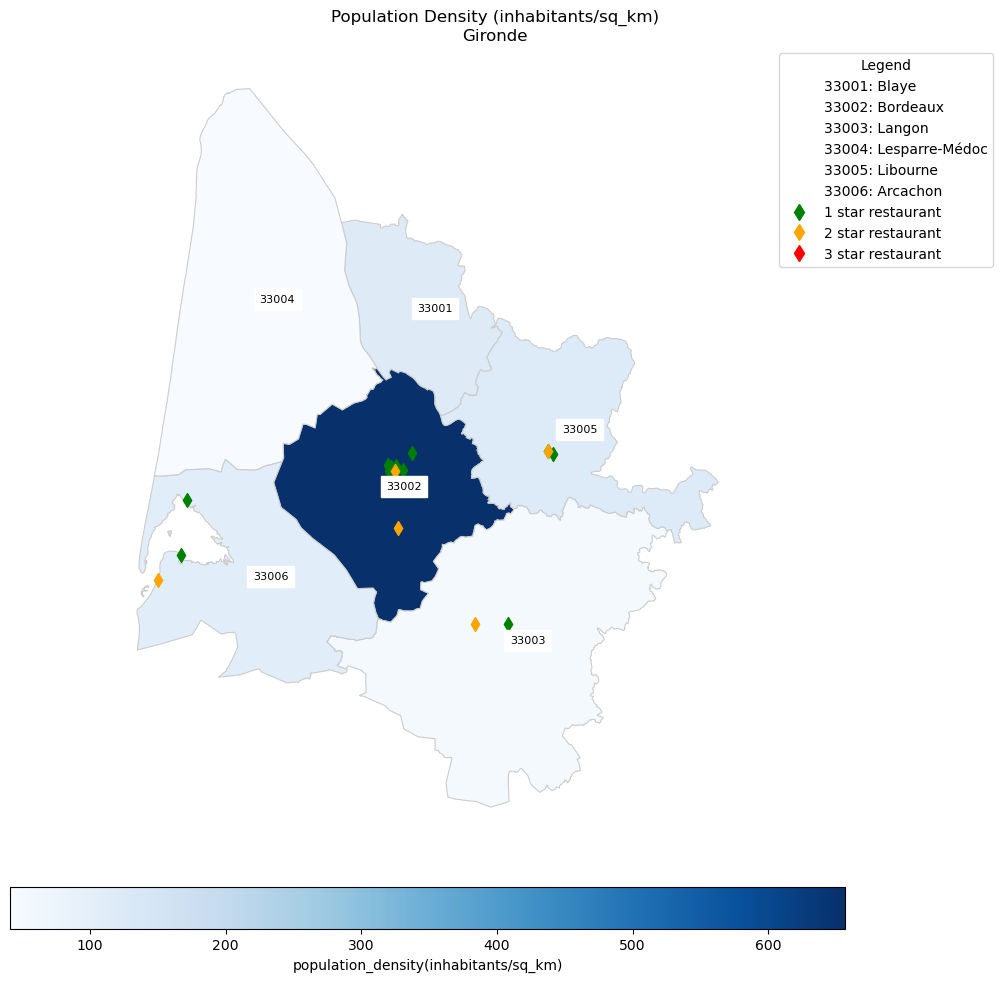

In [26]:
gironde = filter_dataframe(arrondissements, departments=['gironde'])
plot_choropleth(gironde, column='population_density(inhabitants/sq_km)', title='Population Density (inhabitants/sq_km)', granularity='arrondissement', restaurants=True, show_legend=True)

---

### `plot_area_info` function

Plots Michelin Starred Restaurants on a map for a specified department or arrondissement and optionally displays related demographic and restaurant-specific info.

**Arguments**:

- `geo_df` (GeoDataFrame): Geospatial dataframe containing boundaries and statistics.
- `data_df` (DataFrame): Dataframe containing restaurant information 
- `code_or_name` (str or int): The name of the department/arrondissement or the code. 
- `display_restaurants` (bool, optional): If True, plots the location of Michelin Starred Restaurants on the map. Default is True.
- `display_info` (bool, optional): If True, prints additional info for each restaurant. Default is False.
- `figsize` (tuple, optional): Size of the plotted map. Default is (10, 10).

**Returns**:

- None: Displays a map and prints relevant demographic and restaurant-specific info.

1. **Visualization**: The function plots the department with its restaurants, color-coding based on Michelin star rating (1 to 3 stars).
2. **Demographics**: Displays statistics like population, GDP per capita, unemployment rate, and more for the chosen department.
3. **Starred Restaurants**: Lists out Michelin starred restaurants in the department. If `display_info` is set to True, detailed information for each restaurant is printed, including the address, cuisine style, and website.

##### Usage:

```python
plot_area_info(geo_df=arrondissements, data_df=all_france, code_or_name='Nice', display_restaurants=True, display_info=True)
```


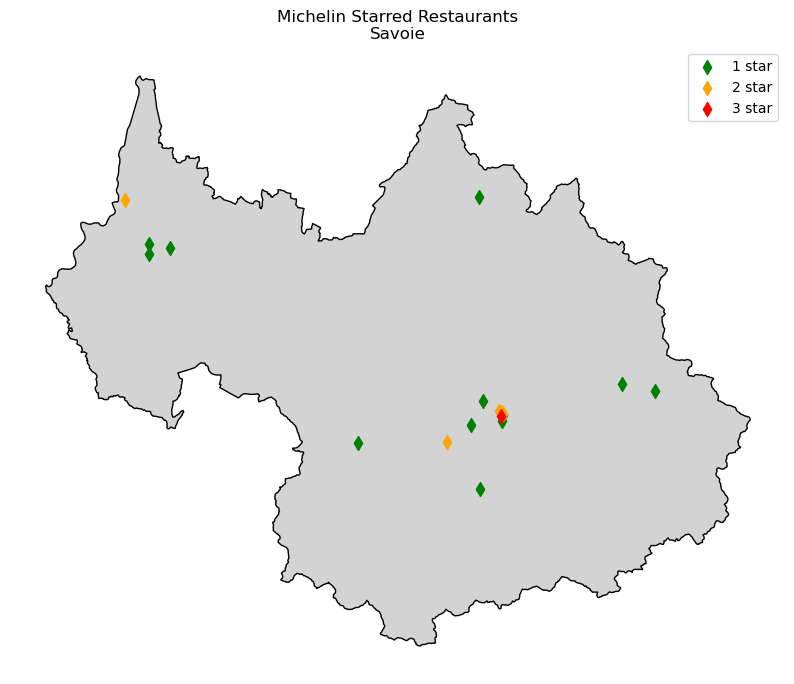

Demographics of Savoie:

Region: Auvergne-Rhône-Alpes 
Capital: Chambéry 
Municipal Population: 439750.0 
Population Density(inhabitants/sq Km): 72.9 
Area(sq Km): 6032.24 
Average Net Hourly Wage(€): 15.64 
Poverty Rate(%): 10.3 
Average Annual Unemployment Rate(%): 5.3 
GDP Per Capita(€): 34566.46 




1 ⭐⭐⭐ Restaurant:




5 ⭐⭐ Restaurants:




12 ⭐ Restaurants:


In [29]:
plot_area_info(departments, all_france, '73', display_info=True)

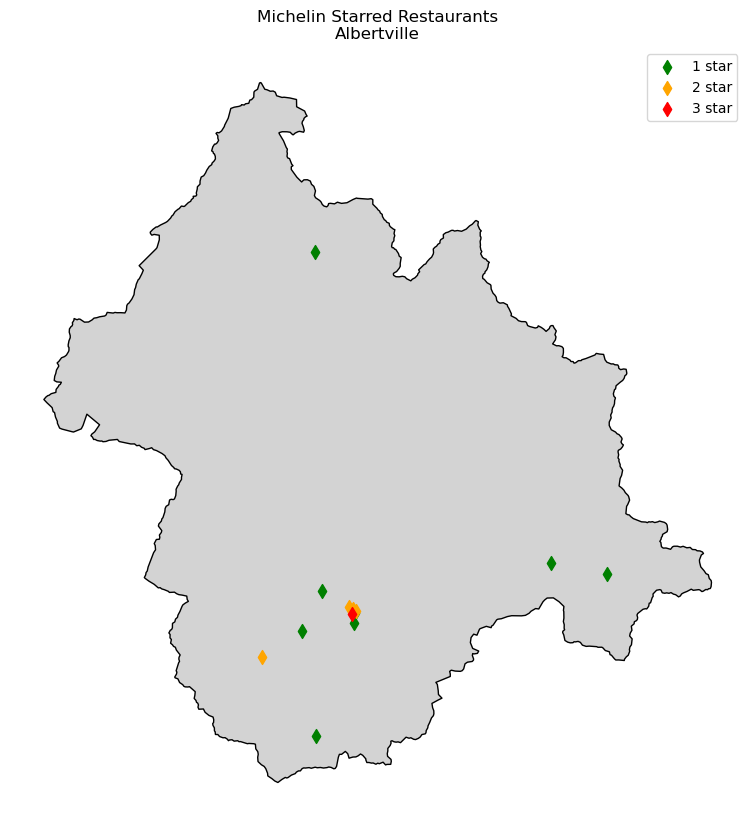

Demographics of Albertville:

Region: Auvergne-Rhône-Alpes 
Capital: Chambéry 
Municipal Population: 112234 
Population Density(inhabitants/sq Km): 45.5 
Average Net Hourly Wage(€): 15.1 
Poverty Rate(%): 11.3 




1 ⭐⭐⭐ Restaurant:


4 ⭐⭐ Restaurants:


8 ⭐ Restaurants:


In [30]:
plot_area_info(arrondissements, all_france, 'albertville', display_info=False)

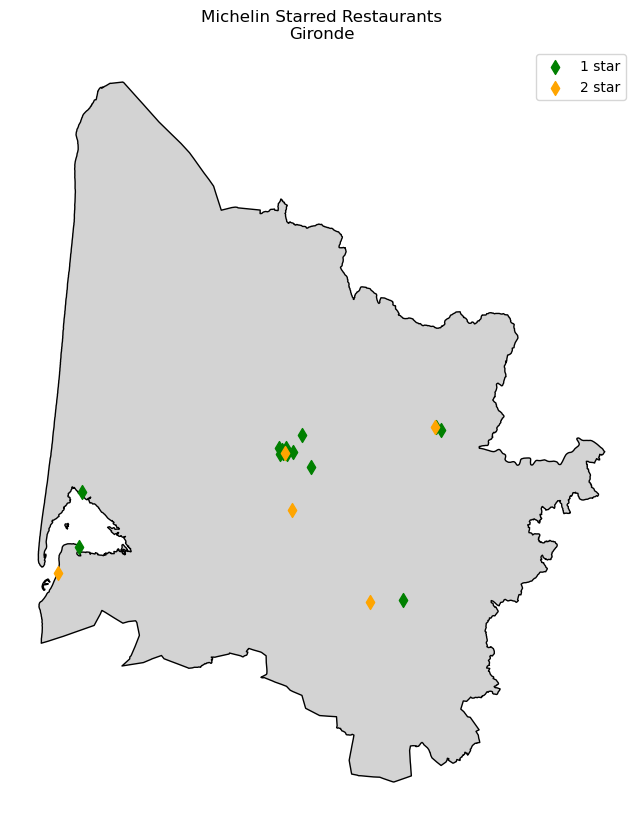

Demographics of Gironde:

Region: Nouvelle-Aquitaine 
Capital: Bordeaux 
Municipal Population: 1636391.0 
Population Density(inhabitants/sq Km): 164.0 
Area(sq Km): 9977.99 
Average Net Hourly Wage(€): 16.01 
Poverty Rate(%): 12.4 
Average Annual Unemployment Rate(%): 6.5 
GDP Per Capita(€): 34152.66 




5 ⭐⭐ Restaurants:




15 ⭐ Restaurants:


In [38]:
plot_area_info(departments, all_france, '33', display_info=True)

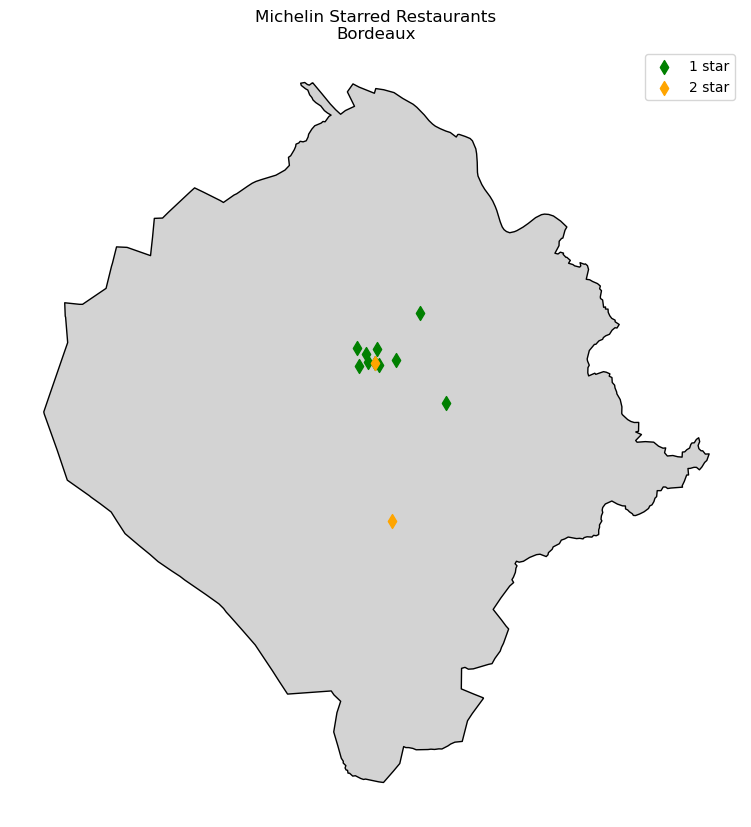

Demographics of Bordeaux:

Region: Nouvelle-Aquitaine 
Capital: Bordeaux 
Municipal Population: 999388 
Population Density(inhabitants/sq Km): 656.7 
Average Net Hourly Wage(€): 16.71 
Poverty Rate(%): 12.4 




2 ⭐⭐ Restaurants:


10 ⭐ Restaurants:


In [39]:
plot_area_info(arrondissements, all_france, 'bordeaux', display_info=False)

The function also handles departments with zero starred restaurants

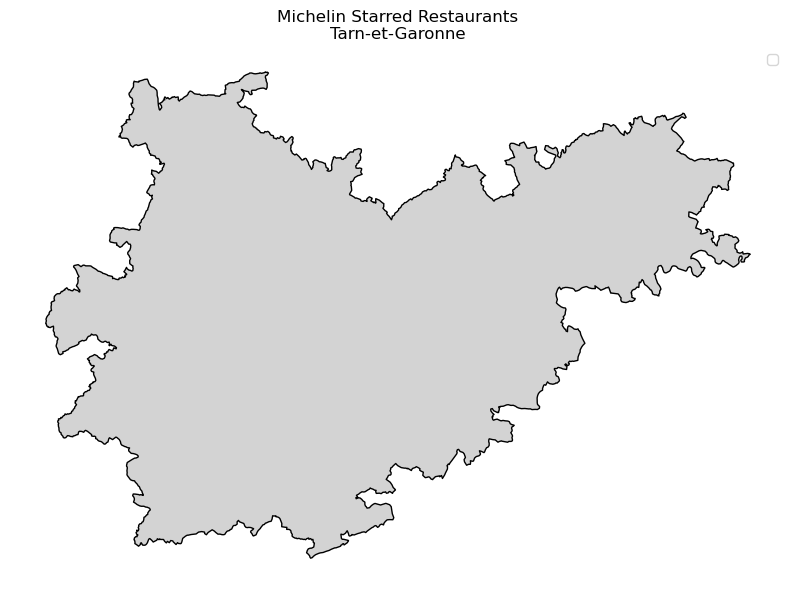

Demographics of Tarn-et-Garonne:

Region: Occitanie 
Capital: Montauban 
Municipal Population: 262316.0 
Population Density(inhabitants/sq Km): 70.5 
Area(sq Km): 3720.79 
Average Net Hourly Wage(€): 13.97 
Poverty Rate(%): 16.3 
Average Annual Unemployment Rate(%): 8.6 
GDP Per Capita(€): 23027.38 





In [40]:
plot_area_info(departments, all_france, '82', display_info=True)

----
&nbsp;
# [Michelin App](https://michelin-france-2ed085da7e1c.herokuapp.com)

Built using Dash, the app integrates data visualization with Plotly to display Michelin-rated restaurants across French departments sourced from CSV and GeoJSON files.

It provides an interactive map that adjusts based on user input from dropdowns, showing different restaurant ratings color-coded by star count, and utilizes hover features to present detailed information about each establishment.

it employs Dash Bootstrap Components and integrates dynamic callbacks to update visualizations in real-time.